# [POLSCI 5] Civil Wars

Estimated Time: 30-40 Minutes <br>
Created by: Lauren Hom, Ravi Singhal

Today we will be examining a dataset (i.e. a table) on civil wars around the world from 1946-2013. The data, which contains information on various types of wars, comes from the Uppsala Conflict Data Program (UCDP). We will be exploring what rows and columns represent in the dataset as well as analyzing some trends in the types of conflicts over time.


### Table of Contents 
* [Jupyter Introduction ](#0) <br>
* [The Dataset](#1)<br>
    * [Rows](#1a)<br>
    * [Columns](#1b)<br>
* [Civil War Analysis](#2)<br>
* [Visualize the Data](#3)<br>
    * [Discussion](#3a)<br>
* [Choose a Conflict](#4)
* [Data Science Opportunities at UC Berkeley](#5)<br>
* [Bibliography](#6)


# Jupyter Introduction <a id='0'></a>

This webpage is a Jupyter Notebook. We will use this notebook to analyze the Uppsala Conflict Data Program (UCDP) Conflict Termination Dataset. Jupyter Notebooks are composed of both regular text and code cells. Code cells have a gray background. In order to run a code cell, click the cell and press `Shift + Enter` while the cell is selected or hit the `▶| Run` button in the toolbar at the top. An example of a code cell is below. Try running it. If everything works properly, the word "Success" should be printed under the cell.

In [19]:
# This cell sets up the notebook. Just run this cell.
from datascience import *
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Success!")

Success!


# The Dataset <a id='1'></a>

The dataset we will look at contains information about conflicts around world from 1946-2013. A **dataset** is a table with rows and columns that contain values. Here is the description of dateset by the author, Joadim Kreutz.

> "Armed conflict is defined by Uppsala Conflict Data Program (UCDP) \[as\] a contested incompatibility that concerns government and/or territory where the use of armed force between two parties, of which at least one is the government of a state, results in at least 25 battle-related deaths in a calender-year."

> "A conflict episode, thus, is defined as the a continuous period of active conflict years in the UCDP-PRIO armed conflict dataset. A conflict episode ends when an active year is followed by a year in which there are fewer than 25 battle-related deaths."


<br>If you want to read more about the dataset, click [here](https://www.pcr.uu.se/research/ucdp/).

<br>Here are the first 5 rows of the dataset. You can scroll horizontally when hovering over the table to see the whole data set. There are 2741 rows and 33 columns

In [2]:
raw = Table.read_table('ucdp-term-dyadic-2015.csv') # read in the dataset
raw.show(5)

ConflictId,DyadId,DyadEp,Year,Location,SideA,SideA2nd,SideB,SideBID,SideB2nd,Incompatibility,TerritoryName,IntensityLevel,TypeOfConflict,Type2,StartDate,StartPrec,StartDate2,StartPrec2,Dyadterm,EpEndDate,EpEndPrec,Outcome_early,Outcome,CfireDate,PeAgDate,GWNoA,GWNoA2nd,GWNoB,GWNoB2nd,GWNoLoc,Region,Version
1-191,1,101,1992,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1993,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1994,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,2,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1995,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1996,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015


As you can see, there are many columns in the dataset. We have cleaned the dataset by removing wars that were not civil wars, removing some columns, and making the values more readable. The cleaned dataset has 12 columns.

In [3]:
wars = Table.read_table('oneWar.csv') # read in the dataset
wars.show(5)

ConflictId,DyadId,Location,SideA,SideB,DisagreementOver,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,Region
1-191,1,Algeria,Government of Algeria,AIS,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,08/27/1985,10/01/1997,Ceasefire,Africa
1-191,2,Algeria,Government of Algeria,Takfir wa'l Hijra,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,12/20/1990,12/31/1991,Actor ceases to exist,Africa
1-191,3,Algeria,Government of Algeria,GIA,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,02/10/1992,12/31/2003,Low activity (less than 25 battle-deaths),Africa
1-131,7,Angola,Government of Angola,UNITA,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,11/11/1975,12/24/1995,Low activity (less than 25 battle-deaths),Africa
1-90,11,Burundi,Government of Burundi,Palipehutu,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,11/23/1991,04/14/1992,Low activity (less than 25 battle-deaths),Africa


Note that both the number of **columns** and the number of **rows** have changed. Run the cell below to compare the number of rows from the original dataset to the cleaned dataset.

In [4]:
print("The original dataset had {} rows. \n\
After removing all non civil war rows, the dataset has {} rows left.".format(raw.num_rows, wars.num_rows))

The original dataset had 2741 rows. 
After removing all non civil war rows, the dataset has 403 rows left.


Let's take a closer look at the cleaned dataset!

## Rows <a id='1a'></a>


First, let's examine what a *row* is. Here is the first row of the dataset.

In [5]:
wars.take(0) # take the first row

ConflictId,DyadId,Location,SideA,SideB,DisagreementOver,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,Region
1-191,1,Algeria,Government of Algeria,AIS,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,08/27/1985,10/01/1997,Ceasefire,Africa


This row gives us information about a specific war that happened in Algeria from 1985-1997. One thing to note is that the `IntensityLevel` of the conflict is Minor. As described in the `IntensityLevel` column, a Minor conflict indicates a war where there were between 25-999 battle-related deaths. 

In [6]:
wars.take(29) # take the third row

ConflictId,DyadId,Location,SideA,SideB,DisagreementOver,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,Region
1-78,53,Ethiopia,Government of Ethiopia,EPLF,Territory,War (at least 1000 battle-related deaths),Internal armed conflict,09/30/1973,05/31/1991,Victory for Side B /Rebel Side,Africa


In comparison, by looking at the 29th row of the dataset, we can see that this conflict in Ethiopia has an `IntensityLevel` of War, meaning there were at least 1000 battle-related deaths.

## Columns <a id='1b'></a>


Next, we will look at some of the columns in the dataset, specifically columns that allow us to better understand the information we are seeing.

### Location
To understand what a *column* is, let's look at a few examples. First, we shall examine the `Location` column. According to the author of the dataset, 
> "Location is defined as the government side of a conflict, and should not be interpreted as the geographical location of the conflict."

To get an idea of what kinds of values are in the `Location` column, here are the number of occurences of the 10 most common locations.

In [7]:
locations = wars.group('Location').sort('count', descending=True) # group by location and sort in descending order
locations

Location,count
Myanmar (Burma),37
India,24
Chad,19
Ethiopia,18
Uganda,14
Sudan,14
Israel,13
Russia (Soviet Union),10
Philippines,9
Iraq,8


Some of the values in the `Location` column of the table are separated by hypens ('-'). This inidcates that the location is a single location. 

Let's look at some of the examples in the table.

In [8]:
# Locations with the two sides of an interstate war
locations.where('Location', are.containing('-'))

Location,count
Bosnia-Herzegovina,5


We can see there is one location that is separated by a hypen ('-'), Bosnia-Herzegovina. 


### Region
Now let's look at the `Region` column. Again, first we'll look at the number of war occurrences of each region.

In [9]:
regions = wars.group('Region').sort('count', descending=True) # count occurences of each region
regions

Region,count
Africa,158
Asia,121
Americas,49
Middle East,42
Europe,33


Above, we can see that the first row with the 'Africa' region has the highest `count`, which means that Africa has the largest number of war occurrences in their region.

### Intensity Level
Lastly, we'll look at the `IntensityLevel` column. 
>The intensity variable is coded in two categories:
>1. Minor: between 25 and 999 battle-related deaths in a given year.
>2. War: at least 1,000 battle-related deaths in a given year.

Here are the number of wars for each type of intensity level, which is represented in the `count` column.

In [10]:
wars.group('IntensityLevel') # group by IntensityLevel

IntensityLevel,count
Minor (between 25 and 999 battle-related deaths),354
War (at least 1000 battle-related deaths),49


As you can see above, there is a higher count for number of "Minor" occurences (354 occurences) versus "War" occurences (49 occurences).

Let's break the Intensity Level down by region. First here are the counts of each `IntensityLevel` in each region.

In [11]:
wars.group(['Region', 'IntensityLevel']).sort('count', descending=True).show() # group by Region and IntensityLevel

Region,IntensityLevel,count
Africa,Minor (between 25 and 999 battle-related deaths),143
Asia,Minor (between 25 and 999 battle-related deaths),106
Americas,Minor (between 25 and 999 battle-related deaths),44
Middle East,Minor (between 25 and 999 battle-related deaths),34
Europe,Minor (between 25 and 999 battle-related deaths),27
Asia,War (at least 1000 battle-related deaths),15
Africa,War (at least 1000 battle-related deaths),15
Middle East,War (at least 1000 battle-related deaths),8
Europe,War (at least 1000 battle-related deaths),6
Americas,War (at least 1000 battle-related deaths),5


We can see that each region appears twice in the `Region` column, once for each type of intensity level. 
For example, in the first row we can see that Africa had 143 wars with a "Minor" intensity level and in the seventh row, we can see that Africa had 15 wars with a "War" intensity level. 

Let's look specifically at the Middle East. Here are the counts of every type of conflict in each Middle East location.

In [12]:
# filter by region, then group by location and intensity level
m_east = wars.where('Region', 'Middle East').group(['Region', 'Location', 'IntensityLevel']).sort(
    'count', descending=True)
m_east

Region,Location,IntensityLevel,count
Middle East,Israel,Minor (between 25 and 999 battle-related deaths),13
Middle East,Iraq,Minor (between 25 and 999 battle-related deaths),7
Middle East,Iran,Minor (between 25 and 999 battle-related deaths),5
Middle East,Turkey,Minor (between 25 and 999 battle-related deaths),3
Middle East,Lebanon,War (at least 1000 battle-related deaths),3
Middle East,Yemen (North Yemen),War (at least 1000 battle-related deaths),2
Middle East,Lebanon,Minor (between 25 and 999 battle-related deaths),2
Middle East,Yemen (North Yemen),Minor (between 25 and 999 battle-related deaths),1
Middle East,Syria,War (at least 1000 battle-related deaths),1
Middle East,Syria,Minor (between 25 and 999 battle-related deaths),1


We can see that the greatest number ‘Minor’ war occurences happened in Israel (13 in total) while the great number of ‘War’ wars happened in Lebanon (3 in total). 

The two rows that show this information from the dataset (above) are shown below.

In [13]:
m_east.take(0) #first row of the dataset, above

Region,Location,IntensityLevel,count
Middle East,Israel,Minor (between 25 and 999 battle-related deaths),13


In [14]:
m_east.take(4) #fifth row of the dataset, above

Region,Location,IntensityLevel,count
Middle East,Lebanon,War (at least 1000 battle-related deaths),3


Lastly, here are the Middle East locations with the most wars.

In [15]:
m_east.where('IntensityLevel', are.containing('War')) # filter to just show war rows

Region,Location,IntensityLevel,count
Middle East,Lebanon,War (at least 1000 battle-related deaths),3
Middle East,Yemen (North Yemen),War (at least 1000 battle-related deaths),2
Middle East,Syria,War (at least 1000 battle-related deaths),1
Middle East,South Yemen,War (at least 1000 battle-related deaths),1
Middle East,Iraq,War (at least 1000 battle-related deaths),1


Again, we can see that the greatest number of war occurences with a 'War' intensity level was Lebanon, followed by Yemen (North Yemen), and so forth.  

# Civil War Analysis <a id='2'></a>
In this section, we will do further analysis on civil war occurrences. Here is the original dataset again.

In [16]:
wars.show(5)

ConflictId,DyadId,Location,SideA,SideB,DisagreementOver,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,Region
1-191,1,Algeria,Government of Algeria,AIS,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,08/27/1985,10/01/1997,Ceasefire,Africa
1-191,2,Algeria,Government of Algeria,Takfir wa'l Hijra,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,12/20/1990,12/31/1991,Actor ceases to exist,Africa
1-191,3,Algeria,Government of Algeria,GIA,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,02/10/1992,12/31/2003,Low activity (less than 25 battle-deaths),Africa
1-131,7,Angola,Government of Angola,UNITA,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,11/11/1975,12/24/1995,Low activity (less than 25 battle-deaths),Africa
1-90,11,Burundi,Government of Burundi,Palipehutu,Government,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,11/23/1991,04/14/1992,Low activity (less than 25 battle-deaths),Africa


First, let's find which years had the most civil wars. In case you're curious about the wars in a particular year, here is [list of civil wars](https://en.wikipedia.org/wiki/List_of_civil_wars).
In order to do this, we will load in a cleaned data set, which shows one row for each year a civil war occurred.

In [17]:
war_years = Table.read_table('cleanedWars.csv') # read in the dataset
war_years.set_format('Year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
war_years.show(3)

Year,ConflictId,DyadId,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1992,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1993,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1994,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


In [26]:
years = war_years.group('Year').sort('count', descending = True) # count number of occurences of each year
years.set_format('Year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
years

Year,count
1991,66
1990,65
1987,63
1986,60
1984,60
1992,59
1989,59
1994,58
1983,58
1982,58


Let's make a bar graph of the `IntensityLevel` for a particular year. Run the cell below, then use the dropdown menu to select a year. After selecting a year, the graph will show the number of conflicts of each intensity level in the chosen year.

In [35]:
@interact(year=np.arange(1946, 2015))
def year_graph(year):
    # filter data by chosen year and group by intensity level
    one_year = war_years.where('Year', year).group('IntensityLevel').sort('IntensityLevel')
    plt.bar(one_year.column('IntensityLevel'), one_year.column('count')) # create bar graph
    plt.xticks((0, 1), ('Minor', 'War')) # set x axis labels to be Minor and War
    plt.ylabel("Count") # set y axis label
    plt.title('Number of Conflicts of Each Intensity Level in {}'.format(year)) # set title of graph
    plt.show()

interactive(children=(Dropdown(description='year', options=(1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 19…

In case you are curious, here is the same code as about, just without the dropdown menu. You can replace the `...` below with a year and then run the cell to generate the same graph as above.

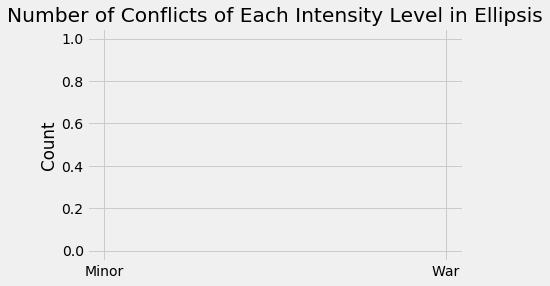

In [34]:
year = ... # replace the ... with a year, for example 1991

# filter data by chosen year and group by intensity level
one_year = war_years.where('Year', year).group('IntensityLevel').sort('IntensityLevel')
plt.bar(one_year.column('IntensityLevel'), one_year.column('count')) # create bar graph
plt.xticks((0, 1), ('Minor', 'War')) # set x axis labels to be Minor and War
plt.ylabel("Count") # set y axis label
plt.title('Number of Conflicts of Each Intensity Level in {}'.format(year)) # set title of graph
plt.show()

You should be able to see two bars in the plot above, one for the "Minor" and one for the "War" intensity levels, for the year you chose.

Next, we're going to examine the `Outcome` of the civil wars. Here are all the possible values in the `Outcome` column.

In [33]:
list(set(wars.column('Outcome')))

['Victory for Side A /Government Side',
 'Peace agreement',
 'Victory for Side B /Rebel Side',
 'Actor ceases to exist',
 'Ceasefire',
 'Low activity (less than 25 battle-deaths)']

A summary of what the Termination Types mean is below: 

- **Actor ceases to exist** -- War activity continues with at least one party no longer existing or becoming a different type of party. For states, this means that the state became part of another country or a central government was no longer obvious. For rebel organizations, this means that the organization changed their name along with altering their alliances or territorial goals
- **Ceasefire** -- Fighting stops, but not necessarily with any resolution. 
- **Low activity (less than 25 battle-deaths)** -- War activity may continue, but fatality rates are below the fatality level defined by the authors of the dataset
- **Peace agreement** -- An agreement signed by opposing sides to formally end the war. 
- **Victory for Side A/Government Side** -- The government side of the war wins and the rebel side loses
- **Victory for Side A/Rebel Side** -- The rebel side wins and the government side loses 

Here are the number of occurances of each Terminatino Type.

In [46]:
wars.group('Outcome').sort('count', descending=True)

Outcome,count
Low activity (less than 25 battle-deaths),127
Victory for Side A /Government Side,93
Peace agreement,50
Actor ceases to exist,46
Victory for Side B /Rebel Side,44
Ceasefire,43


And here is the Termination Type breakdown by region, sorted in order of most occurances.

In [47]:
wars.group(['Region', 'Outcome']).sort('count', descending=True)

Region,Outcome,count
Asia,Low activity (less than 25 battle-deaths),48
Africa,Low activity (less than 25 battle-deaths),48
Africa,Victory for Side A /Government Side,36
Africa,Peace agreement,32
Asia,Victory for Side A /Government Side,27
Asia,Ceasefire,18
Africa,Victory for Side B /Rebel Side,18
Americas,Victory for Side A /Government Side,16
Middle East,Low activity (less than 25 battle-deaths),15
Africa,Actor ceases to exist,15


# Visualize the Data <a id='3'></a>

Here is a bar graph of the outcomes of all the civil wars in the dataset.

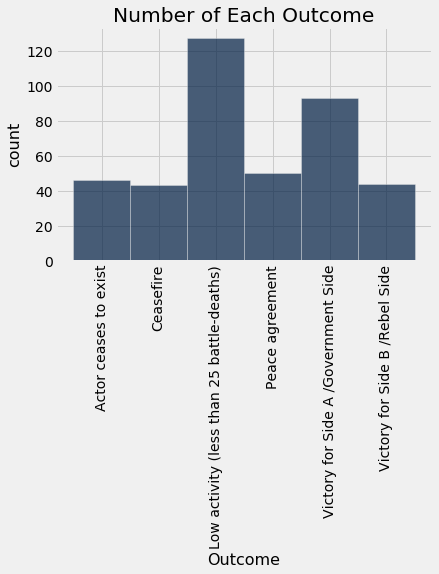

In [43]:
termination_count = civil_wars.group('Outcome') # count number of each termination type
termination_count.bar('Outcome') # generate bar graph
plt.xticks(rotation=90) # make x axis labels vertical
plt.title("Number of Each Outcome") # title graph
plt.show()

We can see that the greatest type of wars terminated are conflicts that did not terminate, labeled with the description you chose in the previous section. We can see the second greatest type of wars terminated are Low activity conflicts. 

Here is the same graph, but zoomed in so we can focus on the last 6 bars. Notice the change in the y axis.

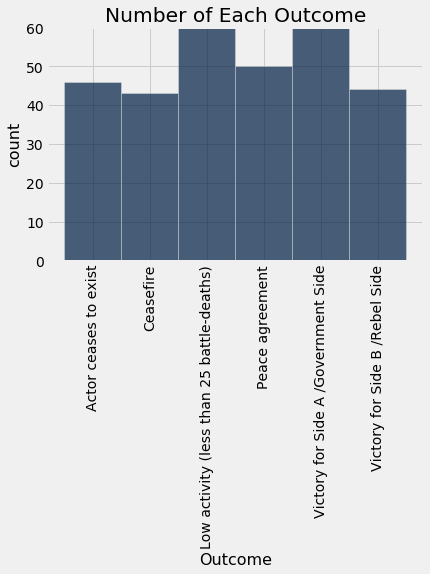

In [47]:
termination_count.bar('Outcome') # generate bar graph
plt.xticks(rotation=90) # make x axis labels vertical
plt.title("Number of Each Outcome") # title graph
plt.ylim(0, 60) # show graph from y = 0 to 250
plt.show()

Now let's visualize how the number of civil wars varies over time. This line graph shows the number of civil wars in each year. You'll notice the spike in the number of wars during the 1990s.

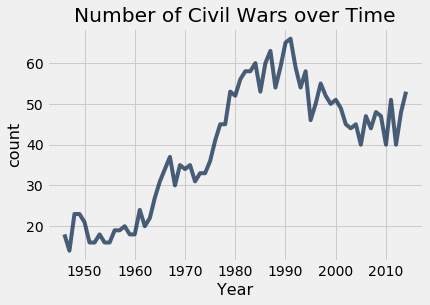

In [50]:
civil_trend = war_years.group('Year') # count number of civil wars per year

civil_trend.plot('Year') # generate line graph
plt.title("Number of Civil Wars over Time") # title graph
plt.show()

## Discussion <a id='3a'></a>

We can see that there was an increasing trend in the number of civil wars between 1946 and 1990, with the highest number of civl wars occurring in the 1990s, particularly 1990 and 1991. 

With a partner, discuss the following question: **What events are occurring around or during the years highlighted above and how might these events influence the trends we observe in the graph (above)?**

For some information to consider, click [here]() to read this article **Insert article listed in meeting notes once link is given**

**Solution (only show in solution notebook??):**

The increase in civil wars is partly attributed to the end of the Cold War in 1991, where many civil wars were occurring in places previously under colonial rule. At the same time, 1990 and 1991 were also years where many civil wars ended, thus contributing to the spike in the 1990s. 

Some links relating to trends in the graph are below:
- For a list of civil wars in the 1990s, click [here](https://en.wikipedia.org/wiki/List_of_civil_wars) and scroll to the "Modern (1800-1945)" and "1945-2000" sections.
- For more information on the influence of the Cold War, click [here](https://en.wikipedia.org/wiki/Civil_war) and scroll to the "Effect of the Cold War" section.
- For more information on the increasing trends in civil wars, click [here](http://documents.worldbank.org/curated/en/908361468779415791/310436360_20050007005532/additional/multi0page.pdf).

# Choose a Conflict  <a id='4'></a>

Run the cell below and select a location in the dropdown menu. We can use this to view only the rows that correspond to the chosen location.

In [42]:
locations = np.sort(list(set(war_years.column('Location'))))
@interact(location=locations)
def location_filter(location):
    war_years.where('Location', location).show()

interactive(children=(Dropdown(description='location', options=('Afghanistan', 'Afghanistan, Russia (Soviet Un…

Use the cells above to choose a conflict that looks the most interesting to you. Once you find one, write down the `DyadId`. Use the dropdown menu below to select the `DyadId` you chose. This will display the rows in the table that have the `DyadId` of your choice.

In [43]:
dyadids = np.sort(list(set(war_years.column('DyadId'))))
@interact(dyadid=dyadids)
def location_filter(dyadid):
    war_years.where('DyadId', dyadid).show()

interactive(children=(Dropdown(description='dyadid', options=(1, 2, 3, 4, 7, 11, 12, 13, 14, 15, 16, 17, 18, 1…

We hope you enjoyed this notebook and learned a few things! In case you wish to explore the dataset more on your own, here is the link to download the dataset: https://ucdp.uu.se/downloads/#d5.

# Data Science Opportunities at UC Berkeley <a id='5'></a>

If you are interested in data science, we offer several courses and even a major / minor here at UC Berkeley. Some great courses to start out are Data 8 and some 2 unit connector courses like History 88 and Demography 88. For the full list of courses we offer, click [here](https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings).

# Bibliography <a id='6'></a>
* Kreutz, Joakim, 2010. How and When Armed Conflicts End: Introducing the UCDP Conflict Termination Dataset. *Journal of Peace Research* 47(2): 243-250.